#**Defungi image classification and fungi type prediction**

In [ ]:
import os
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, LSTM, TimeDistributed
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split

Download **Defungi** Dataset

In [ ]:
import kagglehub

path = kagglehub.dataset_download("anshtanwar/microscopic-fungi-images")

print("Path to dataset files:", path)

100%|██████████| 89.8M/89.8M [00:01<00:00, 70.2MB/s]

Extracting files...


Path to dataset files: /root/.cache/kagglehub/datasets/anshtanwar/microscopic-fungi-images/versions/2


Preprocess the images

In [ ]:
def load_images(path, label, target_shape=(32, 32)):
    images = []
    labels = []
    for filename in os.listdir(path):
        if filename.endswith(".jpg") or filename.endswith(".png"):
            img = tf.keras.preprocessing.image.load_img(os.path.join(path, filename), target_size=target_shape)
            img = tf.keras.preprocessing.image.img_to_array(img)
            images.append(img)
            labels.append(label)
    return np.array(images), np.array(labels)


In [ ]:

seed_value = 50
np.random.seed(seed_value)
tf.random.set_seed(seed_value)


**Loading images and Labeling them**

In [ ]:

H1_path = '/root/.cache/kagglehub/datasets/anshtanwar/microscopic-fungi-images/versions/2/train/H1'
H2_path = '/root/.cache/kagglehub/datasets/anshtanwar/microscopic-fungi-images/versions/2/train/H2'
H3_path = '/root/.cache/kagglehub/datasets/anshtanwar/microscopic-fungi-images/versions/2/train/H3'
H5_path = '/root/.cache/kagglehub/datasets/anshtanwar/microscopic-fungi-images/versions/2/train/H5'
H6_path = '/root/.cache/kagglehub/datasets/anshtanwar/microscopic-fungi-images/versions/2/train/H6'

H1_images, H1_labels = load_images(H1_path, label=0)
H2_images, H2_labels = load_images(H2_path, label=1)
H3_images, H3_labels = load_images(H3_path, label=2)
H5_images, H5_labels = load_images(H5_path, label=4)
H6_images, H6_labels = load_images(H6_path, label=5)




In [ ]:

images = np.concatenate([H1_images, H2_images, H3_images, H5_images, H6_images])
labels = np.concatenate([H1_labels, H2_labels, H3_labels, H5_labels, H6_labels])


images = images / 255.0


X_train, X_test, y_train, y_test = train_test_split(images, labels, test_size=0.2, random_state=seed_value)


y_train = tf.keras.utils.to_categorical(y_train, num_classes=6)
y_test = tf.keras.utils.to_categorical(y_test, num_classes=6)

# Convolutional Neural Network Model

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout


model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(6, activation='softmax')
])


model.summary()


Model: "sequential_9"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_20 (Conv2D)                   │ (None, 30, 30, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_20 (MaxPooling2D)      │ (None, 15, 15, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_21 (Conv2D)                   │ (None, 13, 13, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_21 (MaxPooling2D)      │ (None, 6, 6, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_22 (Conv2D)                   │ (None, 4, 4, 128)           │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_22 (MaxPooling2D)      │ (None, 2, 2, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_7 (Flatten)                  │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_18 (Dense)                     │ (None, 128)                 │          65,664 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_9 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_19 (Dense)                     │ (None, 6)                   │             774 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 159,686 (623.77 KB)

 Trainable params: 159,686 (623.77 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
epochs = 40
history = model.fit(X_train, y_train, epochs=epochs, validation_data=(X_test, y_test), batch_size=32)


Epoch 1/40
125/125 ━━━━━━━━━━━━━━━━━━━━ 7s 43ms/step - accuracy: 0.2849 - loss: 1.5951 - val_accuracy: 0.3680 - val_loss: 1.4091
Epoch 2/40
125/125 ━━━━━━━━━━━━━━━━━━━━ 10s 43ms/step - accuracy: 0.3872 - loss: 1.3673 - val_accuracy: 0.4540 - val_loss: 1.2957
Epoch 3/40
125/125 ━━━━━━━━━━━━━━━━━━━━ 5s 40ms/step - accuracy: 0.4483 - loss: 1.2878 - val_accuracy: 0.5610 - val_loss: 1.1213
Epoch 4/40
125/125 ━━━━━━━━━━━━━━━━━━━━ 7s 54ms/step - accuracy: 0.5006 - loss: 1.2084 - val_accuracy: 0.5320 - val_loss: 1.1350
Epoch 5/40
125/125 ━━━━━━━━━━━━━━━━━━━━ 11s 59ms/step - accuracy: 0.4756 - loss: 1.2104 - val_accuracy: 0.5860 - val_loss: 1.0905
Epoch 6/40
125/125 ━━━━━━━━━━━━━━━━━━━━ 5s 41ms/step - accuracy: 0.4972 - loss: 1.1948 - val_accuracy: 0.5660 - val_loss: 1.0771
Epoch 7/40
125/125 ━━━━━━━━━━━━━━━━━━━━ 12s 57ms/step - accuracy: 0.5072 - loss: 1.1793 - val_accuracy: 0.6010 - val_loss: 1.0445
Epoch 8/40
125/125 ━━━━━━━━━━━━━━━━━━━━ 5s 40ms/step - accuracy: 0.5209 - loss: 1.1430 - val_a

In [ ]:

test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=2)

print(f"Test Accuracy: {test_accuracy * 100:.2f}%")
print(f"Test Loss: {test_loss:.4f}")


32/32 - 1s - 18ms/step - accuracy: 0.7010 - loss: 0.8051
Test Accuracy: 70.10%
Test Loss: 0.8051


In [ ]:

model.save("fungi_classifier.h5")


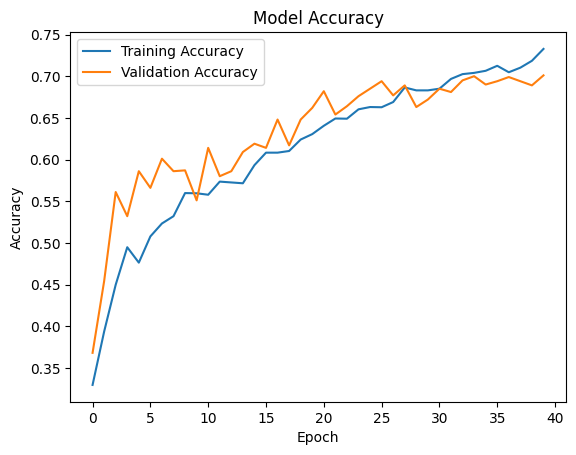

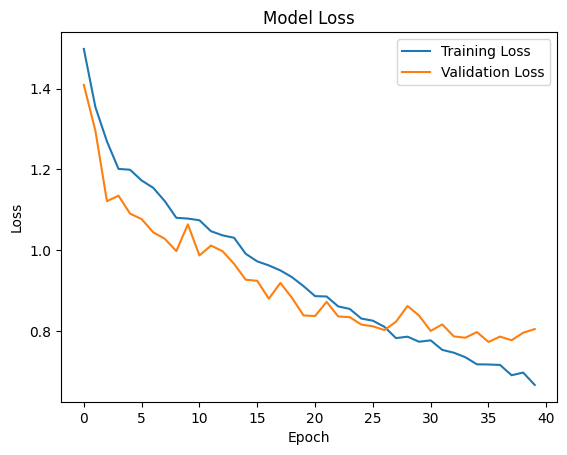

In [ ]:
import matplotlib.pyplot as plt


plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()


In [ ]:
from tensorflow.keras.models import load_model


model = load_model("fungi_classifier.h5")


# Prediction

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step


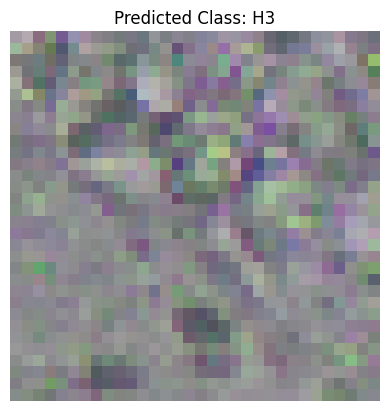

In [ ]:
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import load_img, img_to_array
import numpy as np
from tensorflow.keras.models import load_model


model = load_model("fungi_classifier.h5")


class_labels = {0: "H1", 1: "H2", 2: "H3", 3: "H4", 4: "H5", 5: "H6"}

def preprocess_image(image_path):

    img = load_img(image_path, target_size=(32, 32))

    img_array = img_to_array(img)

    img_array = img_array / 255.0

    img_array = np.expand_dims(img_array, axis=0)
    return img_array, img

image_path = '/root/.cache/kagglehub/datasets/anshtanwar/microscopic-fungi-images/versions/2/test/H3/H3_10a_7.jpg.jpg'


preprocessed_image, original_image = preprocess_image(image_path)

predictions = model.predict(preprocessed_image)

predicted_class = np.argmax(predictions, axis=1)[0]
predicted_label = class_labels[predicted_class]

plt.imshow(original_image)
plt.title(f"Predicted Class: {predicted_label}")
plt.axis("off")
plt.show()
